In [2]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [3]:
picher = pd.read_csv('picher_stats_2017.csv')
picher.shape

(152, 22)

In [4]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [5]:
# 데이터 확인

# nan,0, 타입, 데이터 간격
# str에 대한 데이터 분리
# picher.describe()
# picher.info()
# 결과값의 파악 : picher['연봉(2018)'] 
# hist그래프 출력
# 각각 피쳐간 상관관계 corr, heatmap
# - 피쳐간 관계 : 비슷한 피쳐는 삭제
# 각각 피쳐를 출력 subplots 각각 데이터 분포 파악 
# ( 0 데이터가 어느정도 있는지, 데이터 분포가 어떻게 되는지 )

# 결과값 파악

In [6]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [7]:
# str : 선수명,팀명

In [8]:
picher.describe()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,3.197368,3.157895,1.473684,2.644737,0.888158,28.848684,6.092105,56.953947,7.049605,4.183289,1.209934,0.340507,68.523026,6.046053,1.056908,5.506842,5.536776,0.665921,18932.236842,16505.263158
std,3.863635,3.130929,4.808860,4.515474,1.633869,19.371502,9.750093,50.297632,2.827552,2.362819,1.017072,0.088985,11.591590,4.166645,1.843708,1.871047,1.981596,1.322205,30940.732924,25046.478092
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.700000,0.000000,-1.210000,0.730000,-0.690000,-1.010000,2700.000000,2700.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,19.900000,5.492500,2.585000,0.690000,0.303750,62.400000,4.082500,-0.092500,4.437500,4.347500,-0.060000,4000.000000,3000.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,26.000000,0.000000,43.700000,6.900000,3.750000,1.070000,0.333000,68.250000,5.355000,0.330000,5.210000,5.320000,0.130000,7550.000000,6000.000000
75%,5.000000,6.000000,0.000000,3.000000,1.000000,41.000000,7.000000,80.325000,8.212500,5.262500,1.550000,0.364000,74.525000,7.055000,1.522500,6.392500,6.570000,0.930000,18500.000000,15250.000000
max,20.000000,12.000000,37.000000,24.000000,7.000000,75.000000,31.000000,193.100000,22.500000,18.000000,9.000000,0.833000,100.000000,36.000000,7.280000,18.730000,17.600000,6.620000,230000.000000,150000.000000


In [9]:
picher['연봉(2018)'].sort_values()

103      2700
93       2700
115      2700
82       2800
105      2800
        ...  
4      111000
20     120000
1      120000
0      140000
2      230000
Name: 연봉(2018), Length: 152, dtype: int64

<Axes: >

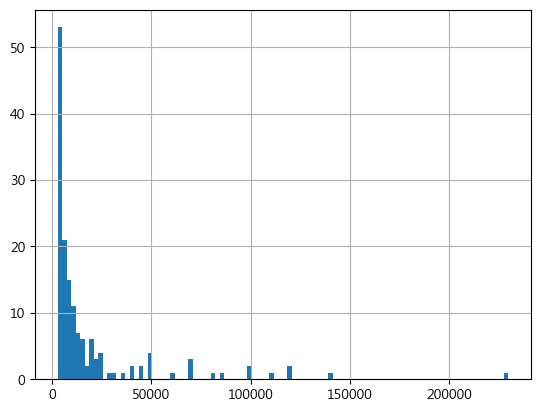

In [10]:
# 년봉 그래프
picher['연봉(2018)'].hist(bins=100)

<Axes: >

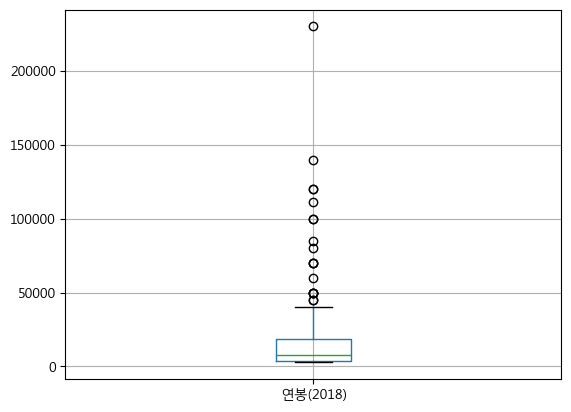

In [11]:
# 주식거래
picher.boxplot(column=['연봉(2018)'])

In [12]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [13]:
#### picher DF
#### 선수명, 팀명 제외 DF
picher_features_df = picher.iloc[:,2:]

In [14]:
picher_features_df.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [15]:
import seaborn as sns

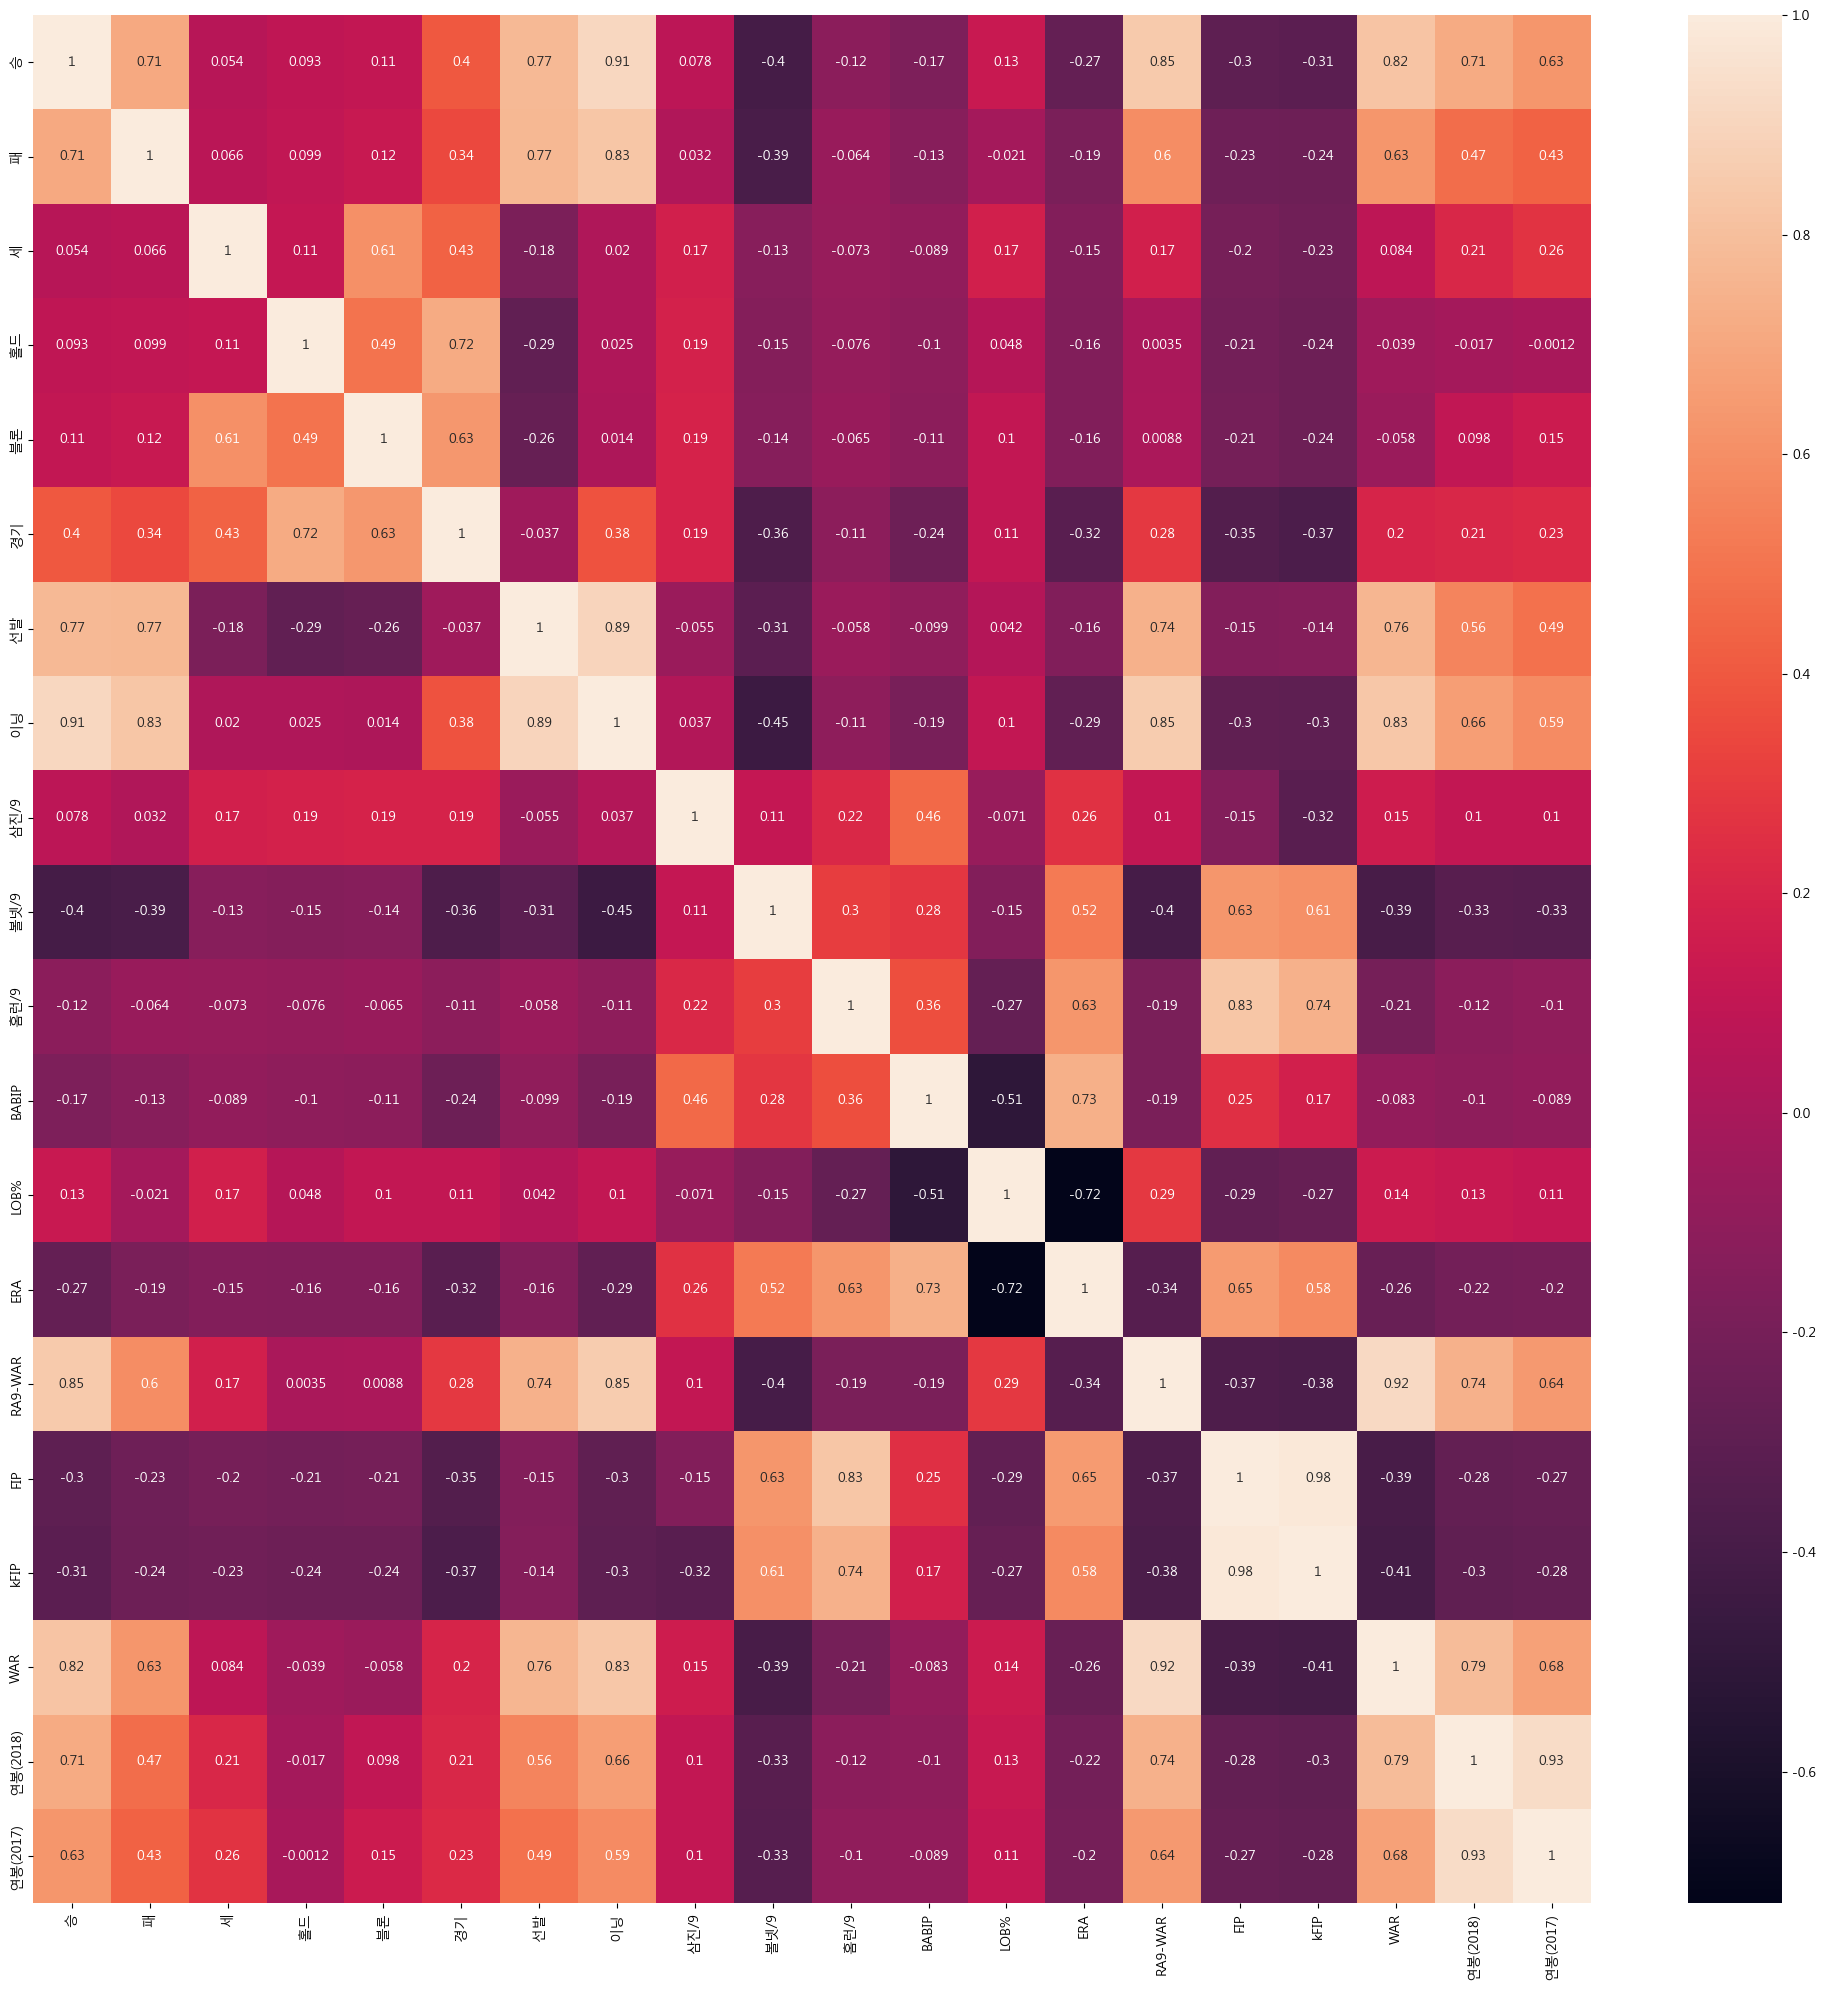

In [16]:
# method : pearson,kendall,spearman
corr = picher_features_df.corr(method='pearson')
show_cols = picher_features_df.columns
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
plt.figure(figsize=(20,20))
# sns.set(font_scale=1.5)
sns.heatmap(corr.values,
            annot = True,
            yticklabels=show_cols,
            xticklabels=show_cols
            )
plt.tight_layout()
plt.show()

In [17]:
# 함수 사용해서 각각 그래프 출력
def plot_hist_each_column(df):
    matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
    fig = plt.figure(figsize=(20,30))
    # plt.rcParams['figure.figsize'] = [20,30]
    # fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins=50) # bins 그래프 폭
        ax.set_title(df.columns[i]) # 컬럼명을 타이틀로 사용

In [18]:
# subplot 여러개의 hist 출력 ( 5 * 5 )
# fig, axs = plt.subplots

# subplots, subplot, add_subplot, subplot2grid

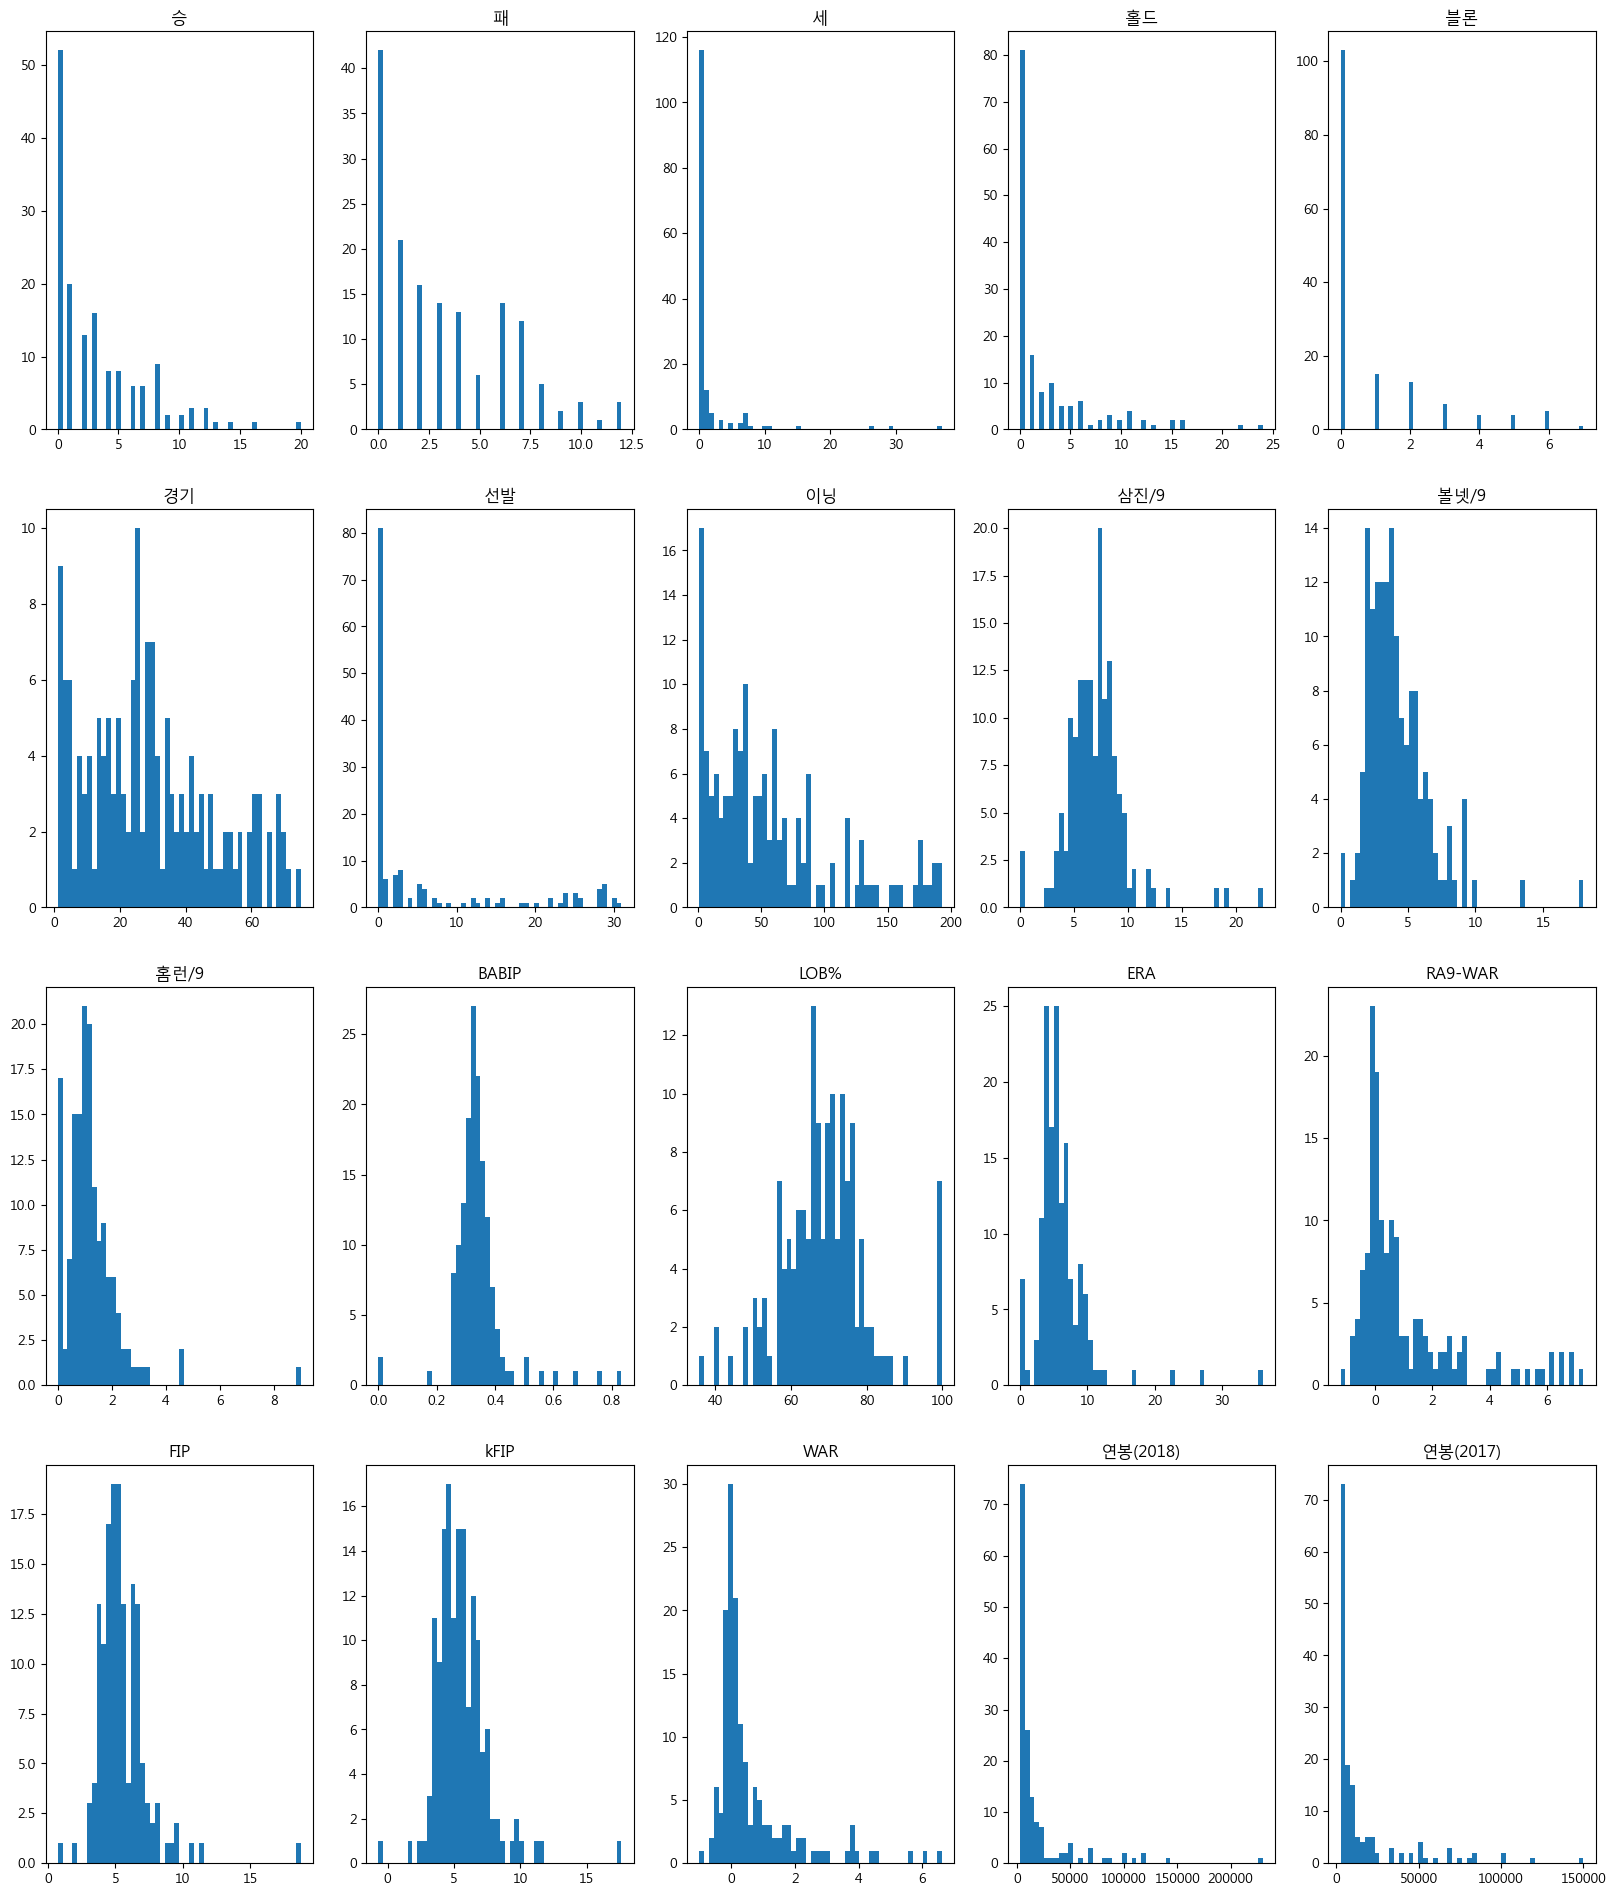

In [19]:
plot_hist_each_column(picher_features_df)
# plt.figure(figsize=(20,20))
# plt.rcParams['figure.figsize'] = [20,20]
# fig = plt.figure(1)
# for i in range(len(picher_features_df.columns)):
#     ax = fig.add_subplot(5,5,i+1)
#     plt.hist(picher_features_df[picher_features_df.columns[i]],bins=50) # bins 그래프 폭
#     ax.set_title(picher_features_df.columns[i]) # 컬럼명을 타이틀로 사용

데이터 확인

In [20]:
# picher - 모든 컬럼 존재
# picher_features_df - 이름, 팀명 분리
# 데이터 전처리

picher_result = picher_features_df['연봉(2018)']
picher_result

picher_y_df = picher_features_df.drop('연봉(2018)',axis=1) 
picher_y_df

# picher : 모든 컬럼 존재
# picher_features_df : 선수명,팀명 제외
# picher_y_df : 연봉(2018),선수명,팀명 제외


,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


In [21]:
# from sklearn.model_selection import train_test_split
# train_input,test_input,train_target,test_target = train_test_split(
#     picher_y_df,picher_result,random_state=42
# )

In [22]:
# 팀명 빠져 있음.

In [23]:
# 표준화 작업
# picher_y_scaled_df : 선수명,팀명,연봉(2018) 제외, 표준화작업 완료상태
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(picher_y_df)
picher_y_scaled_df = ss.transform(picher_y_df)

In [24]:
df_numpy = pd.DataFrame(picher_y_scaled_df)
df_numpy.columns = picher_y_df.columns
df_numpy.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746


In [25]:
type(picher_y_scaled_df)

numpy.ndarray

In [26]:
# 선수명, 팀명 합치기
# concat 두 DataFrame 합치기
picher_y_scaled_nt_df = pd.concat([picher.iloc[:,:2],df_numpy],axis=1)
picher_y_scaled_nt_df

# picher : 모든 컬럼 존재
# picher_features_df : 선수명,팀명 제외
# picher_y_df : 연봉(2018),선수명,팀명 제외
# picher_result : 연봉(2018)
# picher_y_scaled_df : 선수명,팀명,연봉(2018) 제외, 표준화작업 완료상태
# picher_y_scaled_nt_df : 선수명,팀명포함 표준화작업 됨

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,켈리,SK,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,...,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,소사,LG,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,...,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,양현종,KIA,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,...,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,차우찬,LG,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,...,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,레일리,롯데,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,...,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,...,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,정용운,KIA,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,...,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,노경은,롯데,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,...,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,김승현,삼성,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,...,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [27]:
picher_y_scaled_df = pd.DataFrame(picher_y_scaled_df)
picher_y_scaled_df.columns = picher_y_df.columns
picher_y_scaled_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [28]:
type(picher_y_scaled_df)

pandas.core.frame.DataFrame

In [29]:
### 원핫인코딩후 팀명을 추가
# picher['팀명']
team_encoding = pd.get_dummies(picher['팀명'])
team_encoding
# picher_y_scaled_df : 선수명,팀명,연봉(2018) 제외, 표준화작업 완료상태
picher_y_scaled_df = picher_y_scaled_df.join(team_encoding)
picher_y_scaled_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,...,2.743746,False,False,False,False,True,False,False,False,False
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,...,1.341724,False,False,True,False,False,False,False,False,False
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,...,5.347500,True,False,False,False,False,False,False,False,False
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,...,3.344612,False,False,True,False,False,False,False,False,False
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,...,2.743746,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,...,-0.336696,False,False,False,False,False,False,False,False,True
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,...,-0.536985,True,False,False,False,False,False,False,False,False
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,...,-0.020240,False,False,False,False,False,False,True,False,False
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,...,-0.544996,False,False,False,False,False,False,False,True,False


In [30]:
type(picher_y_scaled_df)

pandas.core.frame.DataFrame

In [31]:
type(team_encoding)

pandas.core.frame.DataFrame

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(
    picher_y_scaled_df,picher_result
)

In [33]:
train_input

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
64,-0.051252,1.551652,-0.307465,0.078937,-0.545389,0.681144,-0.009478,0.539498,0.312392,0.406241,...,-0.540991,False,False,False,False,False,False,False,True,False
121,-0.830290,0.269852,-0.098828,-0.587641,0.068679,-0.820849,-0.009478,-0.396034,-1.216933,0.576090,...,1.141435,False,False,False,False,False,False,False,False,True
51,-0.570611,0.269852,-0.307465,2.300865,0.682746,0.577559,-0.626891,-0.356139,0.990121,-0.222200,...,1.341724,False,False,False,False,False,False,True,False,False
117,-0.830290,-1.011947,-0.307465,-0.587641,-0.545389,-1.286985,-0.626891,-1.072250,-0.759200,2.393473,...,-0.540991,False,False,True,False,False,False,False,False,False
19,-0.570611,-0.050597,7.412102,-0.587641,2.524949,1.665209,-0.626891,0.100656,0.692062,-1.096922,...,2.142879,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.468106,0.910752,-0.307465,2.745250,3.139016,1.768795,-0.626891,0.322071,0.284006,-0.056598,...,0.220107,False,False,False,False,False,False,False,False,True
57,-0.570611,-0.050597,-0.307465,1.189901,1.910881,1.199073,-0.626891,-0.098818,-0.106310,-0.158507,...,-0.448858,False,True,False,False,False,False,False,False,False
110,-0.310932,0.910752,1.361631,1.412094,1.296814,0.991902,-0.626891,-0.378082,-0.063730,0.134482,...,0.180049,False,False,False,False,True,False,False,False,False
143,0.468106,-0.050597,-0.307465,-0.587641,-0.545389,0.525766,0.710837,0.643224,-0.684685,-0.328356,...,-0.100355,False,False,False,True,False,False,False,False,False


In [34]:
# 데이터 학습시키기
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [35]:
print(lr.coef_)

[ 4306.15800214 -1691.1711105    295.99645243   557.65836327
   821.68289029 -4035.64251705 -7029.91112223  6200.19269989
 -2413.96796635  2743.82034948  1814.98042171 -2000.38669419
   744.91405803  2847.19151326 -4265.46942373   793.58785726
 -3247.38793753 13135.69365976 22366.54530709  1883.89295672
  1303.73303575  1306.15010265  -359.51648158  2925.4634087
 -6845.51239473  -129.96555202 -3126.97510853  3042.73003304]


In [36]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9281631556067145
0.8915127596831105


In [37]:
#### degree 추가해서 적용해 볼것

In [38]:
#### train세트 평가서 모듈 statsmodels
import statsmodels.api as sm

train_input = sm.add_constant(train_input)
model = sm.OLS(train_target.astype(int),train_input.astype(int)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     41.60
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.62e-38
Time:                        18:17:11   Log-Likelihood:                -1194.5
No. Observations:                 114   AIC:                             2445.
Df Residuals:                      86   BIC:                             2522.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5759.4336   1336.140      4.311      0.000    3103.276    8415.591
승           1.595e+04   3037.941      5.249      0.000    9908.441     2.2e+04
패           2436.1804   2009.387      1.212      0.229   -1558.349    6430.710
세            281.7805   1497.753      0.188      0.851   -2695.654    3259.215
홀드          3041.7730   1889.185      1.610      0.111    -713.803    6797.349
블론          4066.5654   1930.551      2.106      0.038     228.758    7904.373
경기         -1116.9907   2697.471     -0.414      0.680   -6479.385    4245.403
선발         -2509.4021   5213.586     -0.481      0.632   -1.29e+04    7854.864
이닝         -1119.2392   4177.096     -0.268      0.789   -9423.032    7184.554
삼진/9       -3083.5329   2382.130     -1.294      0.199   -7819.051    1651.985
볼넷/9        2230.9267   2484.426      0.898      0.372   -2707.950    7169.803
홈런/9        4138.5371   2752.582      1.504      0.136   -1333.415    9610.489
BABIP        -31.4466   3271.440     -0.010      0.992   -6534.855    6471.962
LOB%         621.6024   2337.563      0.266      0.791   -4025.318    5268.523
ERA          513.9386   3443.501      0.149      0.882   -6331.514    7359.391
RA9-WAR    -2958.4456   3839.309     -0.771      0.443   -1.06e+04    4673.849
FIP        -4747.2663   3835.573     -1.238      0.219   -1.24e+04    2877.601
kFIP       -2003.3387   3785.884     -0.529      0.598   -9529.428    5522.750
WAR         8493.1690   3079.375      2.758      0.007    2371.574    1.46e+04
연봉(2017)     2.61e+04   1777.343     14.684      0.000    2.26e+04    2.96e+04
KIA         -509.5307   2952.872     -0.173      0.863   -6379.647    5360.585
KT         -1192.7680   2520.940     -0.473      0.637   -6204.231    3818.695
LG          1676.2039   2634.116      0.636      0.526   -3560.246    6912.654
NC          1904.8517   3097.139      0.615      0.540   -4252.058    8061.761
SK          3606.4338   2785.471      1.295      0.199   -1930.898    9143.766
두산         -3084.8150   4135.590     -0.746      0.458   -1.13e+04    5136.466
롯데          -302.9788   3359.805     -0.090      0.928   -6982.050    6376.093
삼성         -1741.6970   2722.750     -0.640      0.524   -7154.344    3670.950
한화          5403.7336   2785.576      1.940      0.056    -133.809    1.09e+04
==============================================================================
Omnibus:                       12.577   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               39.107
Skew:                           0.024   Prob(JB):                     3.22e-09
Kurtosis:                       5.869   Cond. No.                     2.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

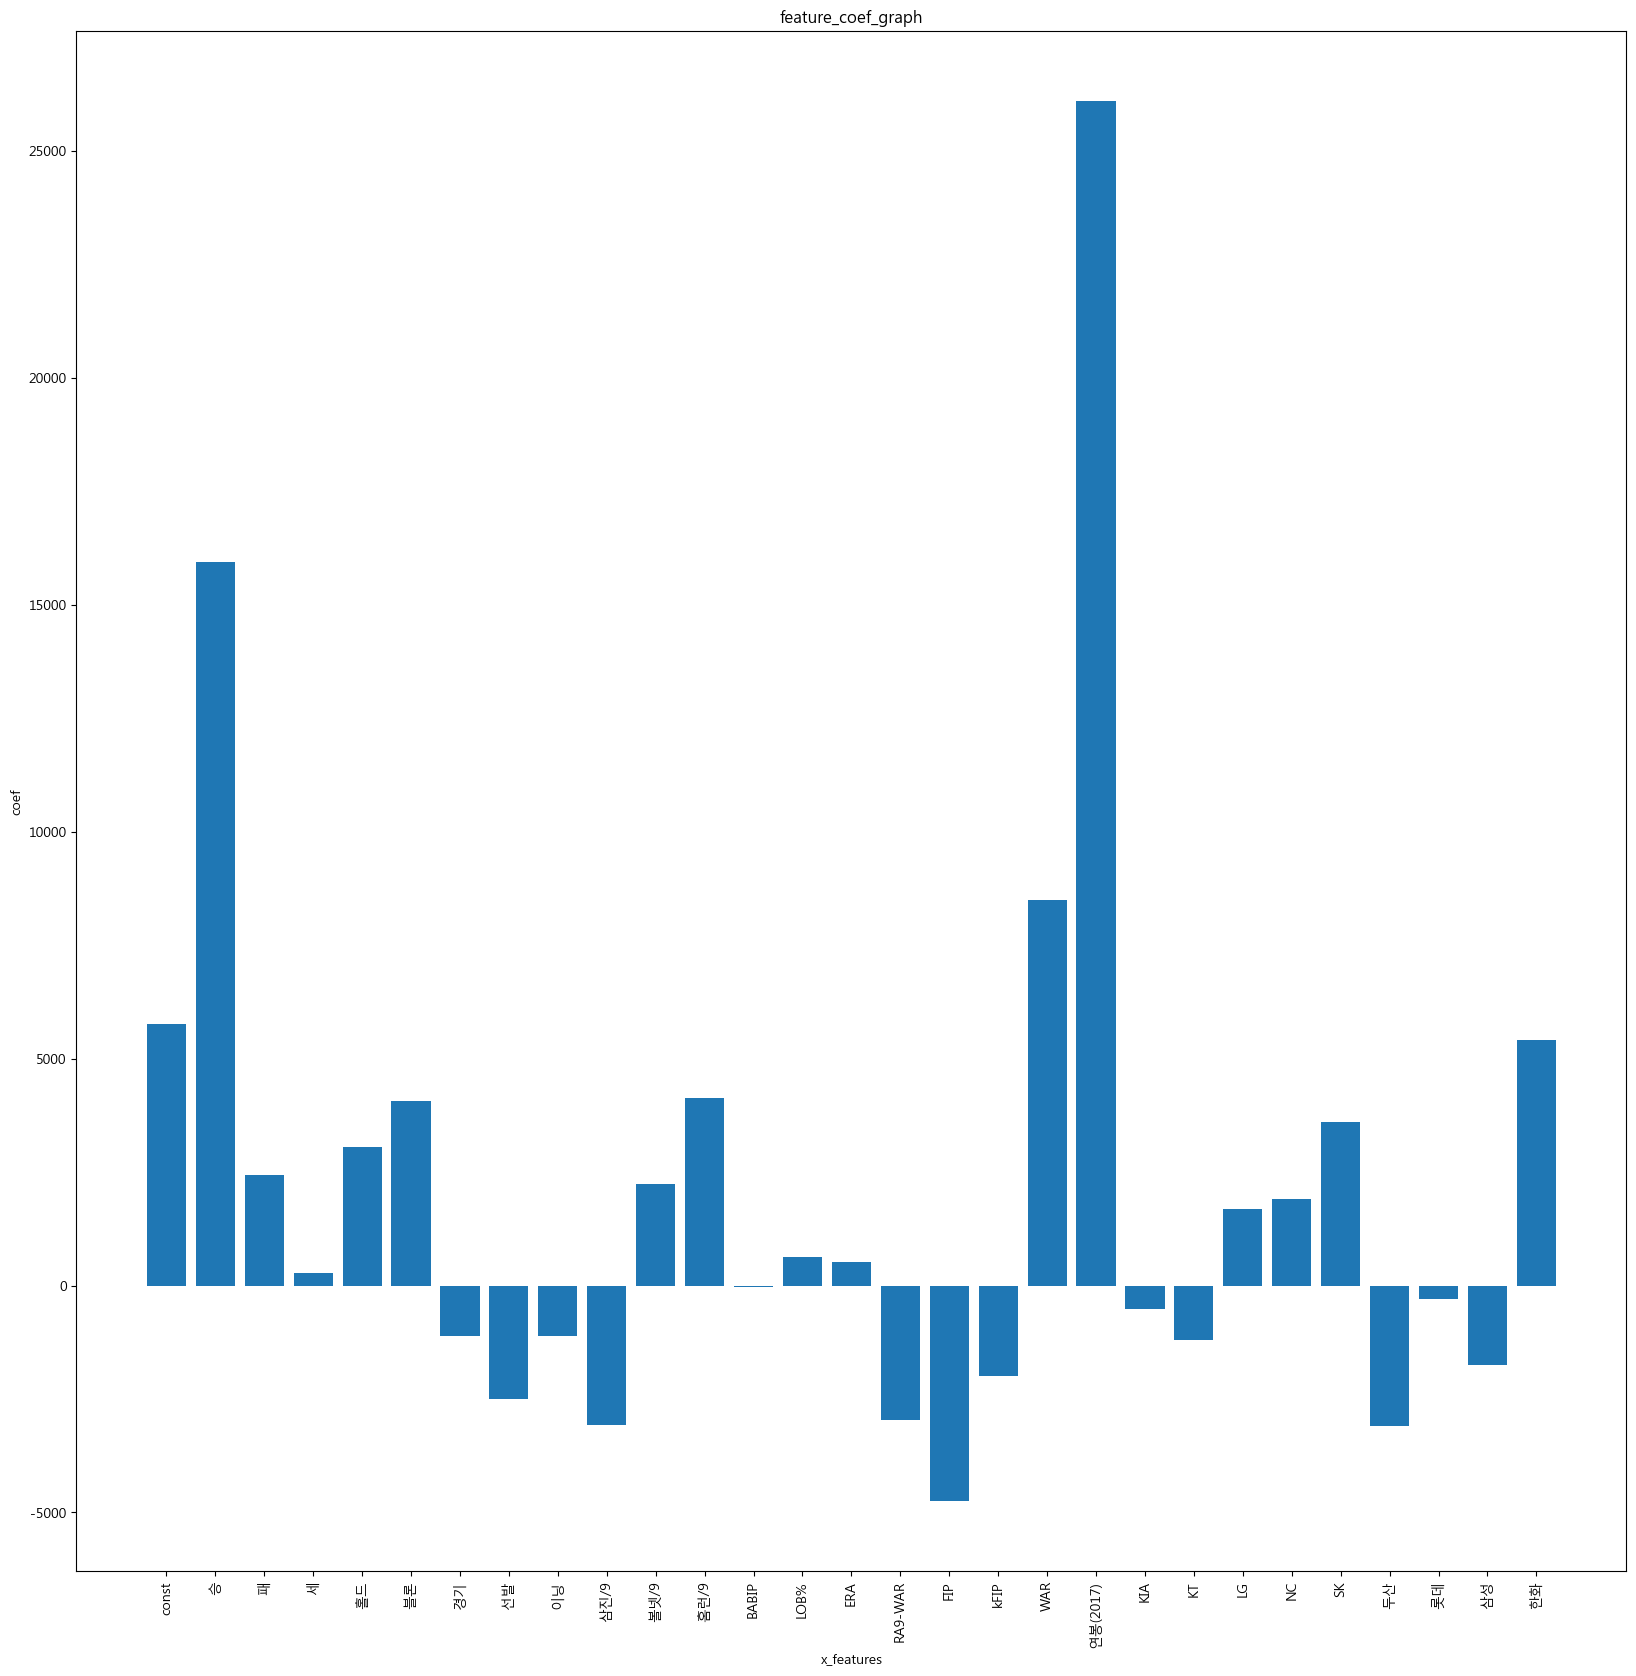

In [39]:
### 평가서 를 그래프 출력
plt.figure(figsize=(20,20))
# 회귀 계수 - 기울기
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명 - 특성이름
x_labels = model.params.index.tolist()

# 그래프 출력
plt.bar(x_labels,coefs_series)
plt.title('feature_coef_graph')
plt.xlabel('x_features')
plt.ylabel('coef')
plt.xticks(rotation=90)

plt.show()


In [40]:
# 회귀분석 예측 - 고려사항 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# 각 피쳐마다 VIF 계수 출력
# target 어느정도 영향을 가했는지 확인
# 값이 높은 것은, 결과 예측에 많은 영향을 미쳤다라고 판단
vif = pd.DataFrame() # 선언
vif['VIF Factor'] = [ variance_inflation_factor(picher_y_scaled_df.values.astype(float),i) for i in range(picher_y_scaled_df.shape[1]) ]
vif['features'] = picher_y_scaled_df.columns
vif.round(1)

,VIF Factor,features
0,8.0,승
1,5.9,패
2,3.1,세
3,3.8,홀드
4,3.0,블론
5,14.6,경기
6,39.6,선발
7,63.8,이닝
8,89.5,삼진/9
9,57.8,볼넷/9


In [42]:
#### ['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']
# 선형회귀 모델을 다시 실행해 보시오.
# print(picher_y_scaled_df.columns)
# print(picher_result)
new_df = picher_y_scaled_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
new_df
picher_result.head()

0    140000
1    120000
2    230000
3    100000
4    111000
Name: 연봉(2018), dtype: int64

In [43]:
train_scaled,test_scaled,train_target,test_target = train_test_split(
    new_df,picher_result
)
train_scaled.head(2)

,FIP,WAR,볼넷/9,삼진/9,연봉(2017)
51,-0.813372,-0.125903,-0.222200,0.990121,1.341724
81,-0.228884,-0.437016,-0.774209,-0.705975,-0.220529


In [44]:
# 데이터 실습시키기
lr = LinearRegression()
lr.fit(train_scaled,train_target)

LinearRegression()

In [45]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9142948393794496
0.9129382501947039


In [46]:
# picher_y_scaled_df

RA9-WAR, kFIP 컬럼 삭제 후 로지스틱 회귀 실행

In [47]:
del_df = picher_y_scaled_df.drop(['RA9-WAR','kFIP'],axis=1)
del_df.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'FIP', 'WAR', '연봉(2017)', 'KIA', 'KT', 'LG',
       'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

In [48]:
train_d_input,test_d_input,train_target,test_target = train_test_split(
    del_df, picher_result
)

In [49]:
lr = LinearRegression()
lr.fit(train_d_input,train_target)

LinearRegression()

In [50]:
print(lr.score(train_d_input,train_target))
print(lr.score(test_d_input,test_target))

0.9490725928018732
0.49657082996430824


VIF Factor 10 넘는 features만 뽑아내서 로지스틱 회귀 실행하기

In [51]:
df_10up = picher_y_scaled_df[['삼진/9','볼넷/9','연봉(2017)','WAR','FIP']]
df_10up

,삼진/9,볼넷/9,연봉(2017),WAR,FIP
0,0.674321,-0.871873,2.743746,4.518029,-0.974240
1,0.134976,-0.990767,1.341724,4.108270,-1.065398
2,0.110138,-0.888857,5.347500,3.774393,-0.840183
3,0.351424,-0.948305,3.344612,3.007992,-0.700764
4,0.156266,-0.880365,2.743746,2.818289,-0.614968
...,...,...,...,...,...
147,-0.972099,-0.375064,-0.336696,-0.861951,0.377052
148,-0.780490,0.605813,-0.536985,-0.877127,0.484298
149,-0.759200,0.308578,-0.020240,-0.968185,1.352985
150,0.205943,1.200284,-0.544996,-1.036478,0.730962


In [52]:
train_u_input,test_u_input,train_target,test_target = train_test_split(
    df_10up, picher_result
)

In [53]:
lr = LinearRegression()
lr.fit(train_u_input,train_target)

LinearRegression()

In [56]:
pre_2018 = lr.predict(test_u_input)
print(pre_2018)

[  1976.35218925   5800.22077204  24221.42089039   4125.45129105
  14042.63686982  75980.85088027   6099.0970369   19734.41382501
  24719.06387971  11179.8735852    7608.27019101  18472.64955714
   6663.99441092   1524.67680842  37914.45647671   8362.64355773
 123206.79931233  10937.92359147 106496.66505206  16844.32184876
   7843.85219562   -891.78167437   6028.22567269  49403.73892391
 116863.68102618  10019.2623196   45919.70954419  17651.19186638
   4758.544931     8755.44912181  12741.99997252   5390.63819427
  11881.12984571   1494.52186404   5321.9314134   26131.71112834
  50505.8644465    1708.97534475]


In [58]:
picher['예측연봉(2018)'] = pre_2018.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [54]:
print(lr.score(train_u_input,train_target))
print(lr.score(test_u_input,test_target))

0.8892966370744381
0.9729008716827856


In [ ]:
picher[['선수명','팀명','연봉(2017)','예측연봉(2018)','연봉(2018)']]